# Fit a Polynomial

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

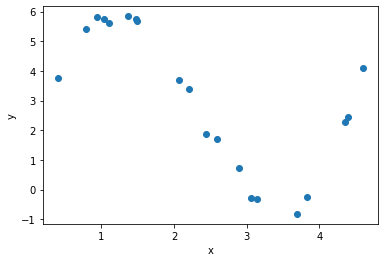

In [2]:
url = 'https://raw.githubusercontent.com/BolunDai0216/nyuMLSummerSchool21/master/day03/polyfit_data.csv'
df = pd.read_csv(url)
x = df['x'].values
y = df['y'].values
plt.plot(x,y,'o')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# Exercice :
1) Compute the Design matrix :
$ \begin{bmatrix} 1 & x_{1} & x_{1}^2 & \cdots & x_{1}^M \\ 1 & x_{2} &
    x_{2}^2 & \cdots & x_{2}^M \\ \vdots & & \ddots & & \vdots \\ 1 & x_{N} & x_{N}^2 & \cdots & x_{N}^M \end{bmatrix}$

2) Compute the Least-Square solution : $\mathbf{w} = (X^TX)^{-1}X^TY$

3) Compute the MSE

4) Make a prediction for xplt = np.linspace(0, 5, 100) and plot your polynomial over the data points

5) Try to find the "best" value for M

the mean square error is -2.032758961156844e-11


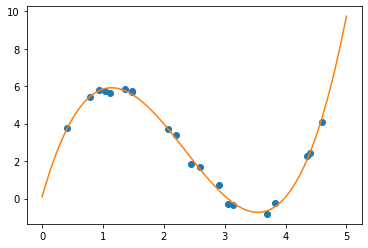

In [4]:
# Choose any integer value for M
M = 5

# TODO: 1) complete this function to return the Design matrix
def design_matrix(x, M):
    lst = []
    # You could use a for-loop or python broadcasting (a for-loop is the easiest choice)
    for i in range(M):
        lst.append(np.power(x, i))
    des_matrix = np.hstack(lst) 
    return des_matrix

# compute the design matrix of x
X = design_matrix(x[:, np.newaxis], 5)
# remember to reshape y to a column vector
y = y.reshape(-1, 1)

# TODO: 2) compute w using the least-square solution above (you can use np.linalg.pinv)
w_ls = np.linalg.inv(X.T @ X)@ X.T @ y

# TODO: 3) compute the MSE
mse_ls = np.mean((X@w_ls - y))
print(f"the mean square error is {mse_ls}")

# TODO 4) make a prediction over "new" data and plot your polynomial fit
xplt = np.linspace(0, 5, 100)
Xplt = design_matrix(xplt[:, np.newaxis], 5)
yplt = Xplt @ w_ls # here you need to use the w_ls obtained from the least-square solution

# plot your polynomial fit
plt.plot(x, y, 'o')
plt.plot(xplt, yplt) # you may want to add the training points (x,y) on the same plot 


# Bonus :

Reproduce your code with sklearn !

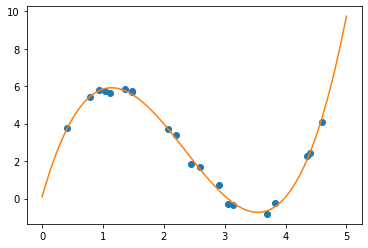

In [5]:
from sklearn import linear_model

# TODO: Bonus

# create a regression model
reg = linear_model.LinearRegression(fit_intercept=False)

# fit the model
reg.fit(X, y)

# use the model to predict
yhat = reg.predict(X)

# plot the same as above (use Xplt as input to your model)
plt.plot(x, y, 'o')
plt.plot(xplt, yplt)

In [6]:
# TODO 5) find the best value for M

# create a set of M values to test
Ms_test = np.arange(1, 21)
mse_s = np.zeros((Ms_test.shape[0], 1))

for i, M in enumerate(Ms_test):
    # - compute Design matrix
    X = design_matrix(x[:, np.newaxis], M)
    # - compute least-square solution (w)
    w_ls = np.linalg.pinv(X) @ y
    # - compute the mse on the predicted data and store it: mse_s[i] = 
    mse_s[i] = np.mean((X@w_ls - y))
    

# find the best M (the value of M associated with the lowest MSE) 
# use  
np.argmin(mse_s)

17

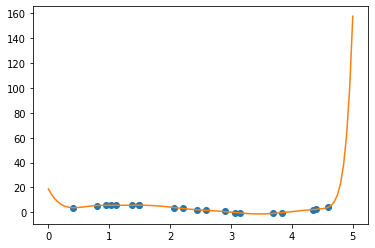

In [7]:
X = design_matrix(x[:, np.newaxis], 17)
w_ls = np.linalg.pinv(X) @ y

xplt = np.linspace(0, 5, 100)
Xplt = design_matrix(xplt[:, np.newaxis], 17)
yplt = Xplt @ w_ls

plt.plot(x, y, 'o')
plt.plot(xplt, yplt)